In [1]:
import numpy as np
from tqdm import tqdm
import pickle

In [5]:
pin = open("X.pickle","rb")
X = pickle.load(pin)

pin = open("y.pickle","rb")
y = pickle.load(pin)

# Validation for fold 3

In [6]:
train_3 = []
train_3 = np.append(X[0:30000], X[40000:50000], axis=0)
val_3 = X[30000:40000]
print(len(train_3), len(val_3), train_3.shape)

40000 10000 (40000, 100, 100, 1)


In [9]:
res = []
for i in tqdm(range(len(val_3))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_3):
        dist_arr = np.abs(val_3[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)    
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [14:08:21<00:00,  5.09s/it]


In [29]:
pin = open("F1.pickle","rb")
f1 = pickle.load(pin)

print(f1[0], len(f1))

[[22845 25271 22489 34626 32217 36030 19202  9805 17295 17383   160 32449
  33756 24551 31748 25755 14476 15163  2313 24488]] 10000


In [30]:
print(len(res), res[0])

10000 [[24311, 2373, 2951, 19100, 18480, 26544, 21654, 18890, 20572, 17568, 32827, 20423, 28681, 28997, 22093, 2634, 17787, 26821, 2000, 32940]]


In [12]:
pout = open("F3.pickle","wb")
pickle.dump(res, pout)
pout.close()

In [300]:
#f1_l = [CATEGORIES[x] for x in f1[0]]
from collections import Counter
l_1 = y[0:40000]
labels_1 = []
l1=[]
for i,x in tqdm(enumerate(f1)):
    
    t=l_1
    for z in x[0]:
        l1.append(t[z])
        t.pop(z)
    #l1 = [t[z] for z in x[0]]
    l11 = []
    for k in range(1, 21, 1):
        l11.append(Counter(l1[0:k]).most_common()[0][0])
    labels_1.append(l11)
    l1 = []

print(len(labels_1))

In [291]:
print(labels_1[7])

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0]


In [292]:
y_1 = y[40000:50000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_1):
        if x[k-1]==y_1[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc), acc)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.35it/s]

20 [0.2313, 0.2313, 0.2258, 0.2205, 0.2091, 0.2023, 0.1996, 0.1998, 0.1966, 0.1932, 0.1909, 0.1838, 0.1835, 0.18, 0.1816, 0.1821, 0.1824, 0.1812, 0.1798, 0.1785]


In [222]:
accuracy = []
print(acc, np.argmax(acc))
accuracy.append([acc])

print(len(accuracy))

[0.2313, 0.2313, 0.2258, 0.2205, 0.2091, 0.2023, 0.1996, 0.1998, 0.1966, 0.1932, 0.1909, 0.1838, 0.1835, 0.18, 0.1816, 0.1821, 0.1824, 0.1812, 0.1798, 0.1785] 0
1


In [34]:
pin = open("F2.pickle","rb")
f2 = pickle.load(pin)

print(f2[0], len(f2))

[[30213  8872 17454 11170 22088 27036 30384 12626  9050  2277 31069 31786
    654 11915  2517 19041 23162 10781 21718 39494]] 10000


In [223]:
l_2 = y[10000:50000]
labels_2 = []
for i,x in tqdm(enumerate(f2)):
    l2 = [l_2[z] for z in x[0]]
    l22 = []
    for k in range(1, 21, 1):
        l22.append(Counter(l2[0:k]).most_common()[0][0])
    labels_2.append(l22)
    l2 = []

print(len(labels_2))

10000it [00:04, 2004.97it/s]

10000


In [224]:
y_2 = y[0:10000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_2):
        if x[k-1]==y_2[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.72it/s]

20


In [225]:
accuracy.append([acc])
print(acc, np.argmax(acc), len(accuracy))

[0.2392, 0.2392, 0.2318, 0.2203, 0.2127, 0.2089, 0.2082, 0.2061, 0.2039, 0.2018, 0.197, 0.1958, 0.1926, 0.1905, 0.1875, 0.188, 0.1854, 0.1863, 0.1848, 0.1833] 0 2


In [38]:
pin = open("F3.pickle","rb")
f3 = pickle.load(pin)

print(f3[0], len(f3))

[[24311, 2373, 2951, 19100, 18480, 26544, 21654, 18890, 20572, 17568, 32827, 20423, 28681, 28997, 22093, 2634, 17787, 26821, 2000, 32940]] 10000


In [226]:
l_3 = np.append(y[0:30000], y[40000:50000], axis=0)
labels_3 = []
for i,x in tqdm(enumerate(f3)):
    l3 = [l_3[z] for z in x[0]]
    l33 = []
    for k in range(1, 21, 1):
        l33.append(Counter(l3[0:k]).most_common()[0][0])
    labels_3.append(l33)
    l3 = []

print(len(labels_3))

10000it [00:09, 1048.85it/s]

10000


In [227]:
y_3 = y[30000:40000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_3):
        if x[k-1]==y_3[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.23it/s]

20


In [228]:
accuracy.append([acc])
print(acc, np.argmax(acc), len(accuracy))

[0.2263, 0.2263, 0.2241, 0.2189, 0.2102, 0.2046, 0.2042, 0.1974, 0.1942, 0.1934, 0.1925, 0.1915, 0.1922, 0.1911, 0.1896, 0.1881, 0.184, 0.1822, 0.1835, 0.1821] 0 3


In [52]:
print(accuracy)

[[[0.2313, 0.2313, 0.2258, 0.2205, 0.2091, 0.2023, 0.1996, 0.1998, 0.1966, 0.1932, 0.1909, 0.1838, 0.1835, 0.18, 0.1816, 0.1821, 0.1824, 0.1812, 0.1798, 0.1785]], [[0.1, 0.1, 0.1, 0.1, 0.0959, 0.0959, 0.0959, 0.0959, 0.0959, 0.0959, 0.1024, 0.1024, 0.1024, 0.1024, 0.1024, 0.1024, 0.102, 0.102, 0.102, 0.102]], [[0.0999, 0.0999, 0.0999, 0.0999, 0.102, 0.102, 0.102, 0.102, 0.102, 0.102, 0.0983, 0.0983, 0.0983, 0.0983, 0.0983, 0.0983, 0.1009, 0.1009, 0.1009, 0.1009]]]


In [54]:
accuracy = np.array(accuracy)
print(accuracy)

[[[0.2313 0.2313 0.2258 0.2205 0.2091 0.2023 0.1996 0.1998 0.1966 0.1932
   0.1909 0.1838 0.1835 0.18   0.1816 0.1821 0.1824 0.1812 0.1798 0.1785]]

 [[0.1    0.1    0.1    0.1    0.0959 0.0959 0.0959 0.0959 0.0959 0.0959
   0.1024 0.1024 0.1024 0.1024 0.1024 0.1024 0.102  0.102  0.102  0.102 ]]

 [[0.0999 0.0999 0.0999 0.0999 0.102  0.102  0.102  0.102  0.102  0.102
   0.0983 0.0983 0.0983 0.0983 0.0983 0.0983 0.1009 0.1009 0.1009 0.1009]]]


In [56]:
pout = open("Accuracy_2.pickle","wb")
pickle.dump(accuracy, pout)
pout.close()

In [57]:
import matplotlib.pyplot as plt

In [61]:
print(accuracy[0][0][0],accuracy[1][0][0])

0.2313 0.1


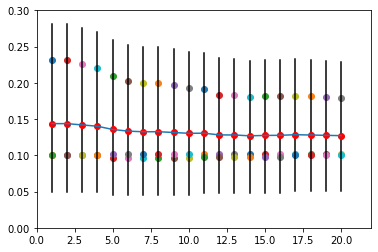

20


In [81]:
av_set = []
for i in range(1,21,1):
    plt.plot(i, accuracy[0][0][i-1], 'o')
    plt.plot(i, accuracy[1][0][i-1], 'o')
    plt.plot(i, accuracy[2][0][i-1], 'o')
    avg = np.mean([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1]])
    av_set.append(avg)
    a_max = max([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1]])
    a_min = min([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1]])
    plt.plot([i,i], [a_min-0.05, a_max+0.05], color='black')
    
    
    plt.plot(i, avg, 'o',  color='r')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], av_set)
plt.ylim([0,0.3])
plt.xlim([0,22])
plt.show()   

print(len(av_set))

In [82]:
val_4 = X[10000:20000]
train_4 = []
train_4 = np.append(X[0:10000], X[20000:50000], axis=0)
print(len(train_4), len(val_4))

40000 10000


In [83]:
# validation for fold 4
res = []
for i in tqdm(range(len(val_4))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_4):
        dist_arr = np.abs(val_4[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)    
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [16:22:24<00:00,  5.89s/it]


In [84]:
pout = open("F4.pickle","wb")
pickle.dump(res, pout)
pout.close()

In [85]:
pin = open("F4.pickle","rb")
f4 = pickle.load(pin)

print(f4[0], len(f4))

[[38624, 25831, 20275, 504, 25669, 29448, 11128, 25124, 25960, 25702, 38372, 19032, 6542, 3334, 2128, 22431, 14597, 30608, 5997, 33677]] 10000


In [229]:
l_4 = np.append(y[0:10000], y[20000:50000], axis=0)
labels_4 = []
for i,x in tqdm(enumerate(f4)):
    l4 = [l_4[z] for z in x[0]]
    l44 = []
    for k in range(1, 21, 1):
        l44.append(Counter(l4[0:k]).most_common()[0][0])
    labels_4.append(l44)
    l4 = []

print(len(labels_4))

10000it [00:05, 1909.66it/s]

10000


In [230]:
y_4 = y[10000:20000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_4):
        if x[k-1]==y_4[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.75it/s]

20


In [231]:
accuracy.append([acc])
print(acc, np.argmax(acc), len(accuracy))

[0.2424, 0.2424, 0.2372, 0.2257, 0.2169, 0.2066, 0.2043, 0.2055, 0.2021, 0.1986, 0.1965, 0.1926, 0.19, 0.1882, 0.188, 0.1849, 0.1852, 0.1814, 0.1829, 0.1806] 0 4


In [232]:
accuracy = np.array(accuracy)
print(accuracy)

[[[0.2313 0.2313 0.2258 0.2205 0.2091 0.2023 0.1996 0.1998 0.1966 0.1932
   0.1909 0.1838 0.1835 0.18   0.1816 0.1821 0.1824 0.1812 0.1798 0.1785]]

 [[0.2392 0.2392 0.2318 0.2203 0.2127 0.2089 0.2082 0.2061 0.2039 0.2018
   0.197  0.1958 0.1926 0.1905 0.1875 0.188  0.1854 0.1863 0.1848 0.1833]]

 [[0.2263 0.2263 0.2241 0.2189 0.2102 0.2046 0.2042 0.1974 0.1942 0.1934
   0.1925 0.1915 0.1922 0.1911 0.1896 0.1881 0.184  0.1822 0.1835 0.1821]]

 [[0.2424 0.2424 0.2372 0.2257 0.2169 0.2066 0.2043 0.2055 0.2021 0.1986
   0.1965 0.1926 0.19   0.1882 0.188  0.1849 0.1852 0.1814 0.1829 0.1806]]]


In [233]:
pout = open("Accuracy_2.pickle","wb")
pickle.dump(accuracy, pout)
pout.close()


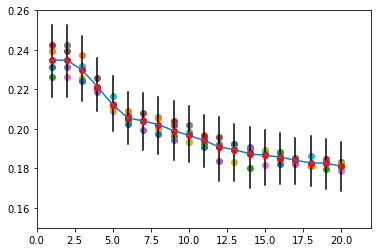

In [237]:
av_set = []
for i in range(1,21,1):
    plt.plot(i, accuracy[0][0][i-1], 'o')
    plt.plot(i, accuracy[1][0][i-1], 'o')
    plt.plot(i, accuracy[2][0][i-1], 'o')
    plt.plot(i, accuracy[3][0][i-1], 'o')
    avg = np.mean([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1],accuracy[3][0][i-1]])
    av_set.append(avg)
    a_max = max([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1],accuracy[3][0][i-1]])
    a_min = min([accuracy[0][0][i-1],accuracy[1][0][i-1],accuracy[2][0][i-1],accuracy[3][0][i-1]])
    plt.plot([i,i], [a_min-0.01, a_max+0.01], color='black')
    
    
    plt.plot(i, avg, 'o',  color='r')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], av_set)
plt.ylim([0.15,0.26])
plt.xlim([0,22])
plt.show()   

In [193]:
val_5 = X[20000:30000]
train_5 = []
train_5 = np.append(X[0:20000], X[30000:50000], axis=0)
print(len(train_5), len(val_5))

40000 10000


In [245]:
res = []
for i in tqdm(range(len(val_5))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_5):
        dist_arr = np.abs(val_5[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist) 
        
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 

  3%|██▏                                                                        | 287/10000 [24:40<13:55:09,  5.16s/it]


KeyboardInterrupt: 

In [4]:
pin = open("X.pickle","rb")
X = pickle.load(pin)

pin = open("y.pickle","rb")
y = pickle.load(pin) 

In [2]:
pin = open("F1.pickle","rb")
f1 = pickle.load(pin)

print(f1[0], len(f1))

[[22845 25271 22489 34626 32217 36030 19202  9805 17295 17383   160 32449
  33756 24551 31748 25755 14476 15163  2313 24488]] 10000


In [15]:
#f1_l = [CATEGORIES[x] for x in f1[0]]
from collections import Counter
l_1 = np.array(y[0:40000])
labels_1 = []
for i,x in tqdm(enumerate(f1)):
    l1=[]
    t=[x for x in l_1]
    for z in x[0]:
        l1.append(t[z])
        t.remove(t[z])
    t=[]
    #l1 = [t[z] for z in x[0]]
    l11 = []
    for k in range(1, 21, 1):
        l11.append(Counter(l1[0:k]).most_common()[0][0])
    labels_1.append(l11)

print(len(labels_1))


10000it [03:31, 47.35it/s]

10000


In [6]:
print(labels_1[0])

[8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


In [9]:
y_1 = y[40000:50000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_1):
        if x[k-1]==y_1[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc), acc, np.argmax(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.45it/s]

20 [0.2313, 0.2313, 0.2291, 0.2207, 0.2157, 0.2132, 0.2096, 0.2097, 0.209, 0.2039, 0.2034, 0.198, 0.1985, 0.1955, 0.1932, 0.1935, 0.1921, 0.1918, 0.1918, 0.1896] 0


In [16]:
accuracy_1 = []
print(acc, np.argmax(acc))
accuracy_1.append([acc])

print(len(accuracy_1))

[0.2313, 0.2313, 0.2291, 0.2207, 0.2157, 0.2132, 0.2096, 0.2097, 0.209, 0.2039, 0.2034, 0.198, 0.1985, 0.1955, 0.1932, 0.1935, 0.1921, 0.1918, 0.1918, 0.1896] 0
1


In [17]:
pin = open("F2.pickle","rb")
f2 = pickle.load(pin)

print(f2[0], len(f2))

[[30213  8872 17454 11170 22088 27036 30384 12626  9050  2277 31069 31786
    654 11915  2517 19041 23162 10781 21718 39494]] 10000


In [25]:
l_2 =np.array(y[10000:50000])
labels_2 = []
for i,x in tqdm(enumerate(f2)):
    l2=[]
    t=[x for x in l_2]
    for z in x[0]:
        l2.append(t[z])
        t.remove(t[z])
    
    t=[]
    #l2 = [l_2[z] for z in x[0]]
    l22 = []
    for k in range(1, 21, 1):
        l22.append(Counter(l2[0:k]).most_common()[0][0])
    labels_2.append(l22)

print(len(labels_2))

10000it [03:41, 45.12it/s]

10000


In [26]:
print(labels_2[0])

[0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


In [27]:
y_2 = y[0:10000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_2):
        if x[k-1]==y_2[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc), acc, np.argmax(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 58.43it/s]

20 [0.2392, 0.2392, 0.2357, 0.2269, 0.2148, 0.2038, 0.1966, 0.1986, 0.1963, 0.1931, 0.1942, 0.1868, 0.1859, 0.1824, 0.1807, 0.1836, 0.1796, 0.1783, 0.1764, 0.1738] 0


In [28]:
accuracy_1.append([acc])
print(acc, np.argmax(acc), len(accuracy_1))

[0.2392, 0.2392, 0.2357, 0.2269, 0.2148, 0.2038, 0.1966, 0.1986, 0.1963, 0.1931, 0.1942, 0.1868, 0.1859, 0.1824, 0.1807, 0.1836, 0.1796, 0.1783, 0.1764, 0.1738] 0 2


In [32]:
pin = open("F3.pickle","rb")
f3 = pickle.load(pin)

print(f3[0], len(f3))

[[24311, 2373, 2951, 19100, 18480, 26544, 21654, 18890, 20572, 17568, 32827, 20423, 28681, 28997, 22093, 2634, 17787, 26821, 2000, 32940]] 10000


In [33]:
l_3 = np.append(y[0:30000], y[40000:50000], axis=0)
labels_3 = []
for i,x in tqdm(enumerate(f3)):
    l3=[]
    t=[x for x in l_3]
    for z in x[0]:
        l3.append(t[z])
        t.remove(t[z])
    
    t=[]
    #l3 = [l_3[z] for z in x[0]]
    l33 = []
    for k in range(1, 21, 1):
        l33.append(Counter(l3[0:k]).most_common()[0][0])
    labels_3.append(l33)
    l3 = []

print(len(labels_3))
print(labels_3[0])

10000it [03:27, 48.14it/s]

10000
[3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4]


In [41]:
y_3 = y[30000:40000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_3):
        
        #print(x[k-1],y_3[i])
        if x[k-1]==y_3[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc), acc, np.argmax(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.41it/s]

20 [0.2263, 0.2263, 0.2226, 0.2161, 0.2075, 0.2016, 0.1979, 0.2006, 0.1961, 0.198, 0.1916, 0.1898, 0.185, 0.1812, 0.1818, 0.1798, 0.1788, 0.1801, 0.1801, 0.1782] 0


In [42]:
accuracy_1.append([acc])
print(acc, np.argmax(acc), len(accuracy_1))

[0.2263, 0.2263, 0.2226, 0.2161, 0.2075, 0.2016, 0.1979, 0.2006, 0.1961, 0.198, 0.1916, 0.1898, 0.185, 0.1812, 0.1818, 0.1798, 0.1788, 0.1801, 0.1801, 0.1782] 0 3


In [43]:
pin = open("F4.pickle","rb")
f4 = pickle.load(pin)

print(f4[0], len(f4))

[[38624, 25831, 20275, 504, 25669, 29448, 11128, 25124, 25960, 25702, 38372, 19032, 6542, 3334, 2128, 22431, 14597, 30608, 5997, 33677]] 10000


In [44]:
l_4 = np.append(y[0:10000], y[20000:50000], axis=0)
labels_4 = []
for i,x in tqdm(enumerate(f4)):
    l4 = []
    t=[x for x in l_4]
    for z in x[0]:
        l4.append(t[z])
        t.remove(t[z])
    
    t=[]
    #l4 = [l_4[z] for z in x[0]]
    l44 = []
    for k in range(1, 21, 1):
        l44.append(Counter(l4[0:k]).most_common()[0][0])
    labels_4.append(l44)
    

print(len(labels_4))
print(labels_4[0])

10000it [03:25, 48.60it/s]

10000
[7, 7, 7, 1, 7, 7, 1, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [45]:
y_4 = y[10000:20000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_4):
        if x[k-1]==y_4[i]:
            c += 1
    a = (c/10000)
    acc.append(a)
    c = 0
print(len(acc), acc,np.argmax(acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.40it/s]

20 [0.2424, 0.2424, 0.2325, 0.224, 0.219, 0.2079, 0.2032, 0.1998, 0.2006, 0.1997, 0.1953, 0.1915, 0.1864, 0.1846, 0.1846, 0.1815, 0.1828, 0.1793, 0.1777, 0.1755] 0


In [46]:
accuracy_1.append([acc])
print(acc, np.argmax(acc), len(accuracy_1))

[0.2424, 0.2424, 0.2325, 0.224, 0.219, 0.2079, 0.2032, 0.1998, 0.2006, 0.1997, 0.1953, 0.1915, 0.1864, 0.1846, 0.1846, 0.1815, 0.1828, 0.1793, 0.1777, 0.1755] 0 4


In [47]:
accuracy_1 = np.array(accuracy_1)

In [50]:
import matplotlib.pyplot as plt

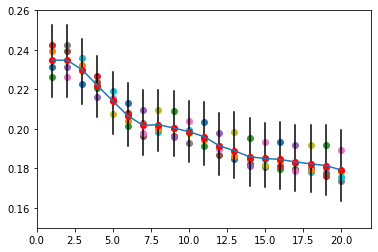

In [51]:
av_set = []
for i in range(1,21,1):
    plt.plot(i, accuracy_1[0][0][i-1], 'o')
    plt.plot(i, accuracy_1[1][0][i-1], 'o')
    plt.plot(i, accuracy_1[2][0][i-1], 'o')
    plt.plot(i, accuracy_1[3][0][i-1], 'o')
    avg = np.mean([accuracy_1[0][0][i-1],accuracy_1[1][0][i-1],accuracy_1[2][0][i-1],accuracy_1[3][0][i-1]])
    av_set.append(avg)
    a_max = max([accuracy_1[0][0][i-1],accuracy_1[1][0][i-1],accuracy_1[2][0][i-1],accuracy_1[3][0][i-1]])
    a_min = min([accuracy_1[0][0][i-1],accuracy_1[1][0][i-1],accuracy_1[2][0][i-1],accuracy_1[3][0][i-1]])
    plt.plot([i,i], [a_min-0.01, a_max+0.01], color='black')
    
    
    plt.plot(i, avg, 'o',  color='r')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], av_set)
plt.ylim([0.15,0.26])
plt.xlim([0,22])
plt.show()   